In [44]:
import numpy as np
from matplotlib import pyplot as plt

from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, GlobalAveragePooling2D,Input,Dropout
from keras.utils import np_utils

In [23]:
X_train = np.load("./pokemon_data/data_dump/X_train.npy")
Y_train = np.load("./pokemon_data/data_dump/Y_train.npy")
Y_train = np_utils.to_categorical(Y_train)

In [16]:
print (X_train.shape, Y_train.shape)

((1252, 227, 227, 3), (1252, 10))


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


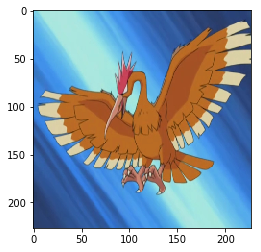

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


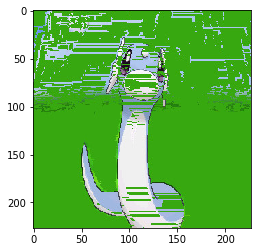

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


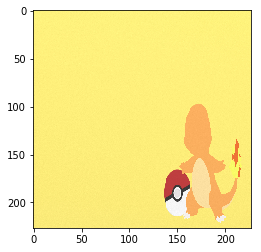

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


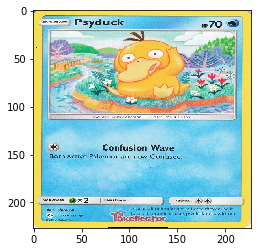

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


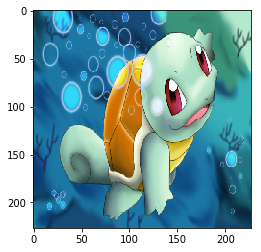

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


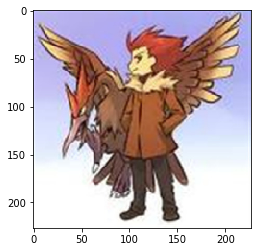

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


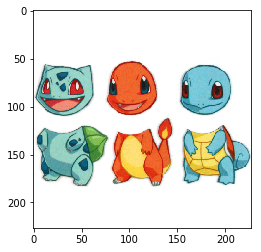

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


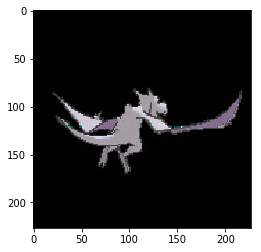

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


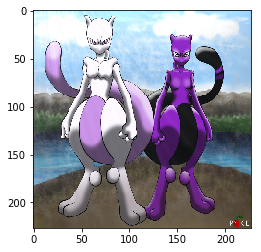

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


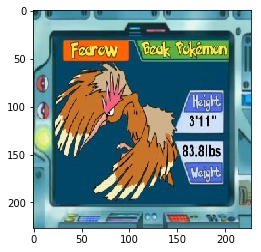

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


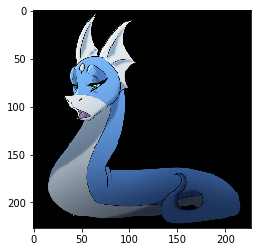

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


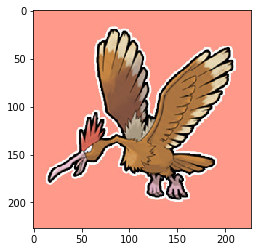

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


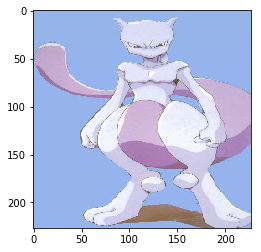

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


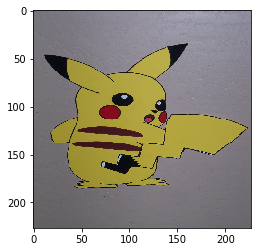

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


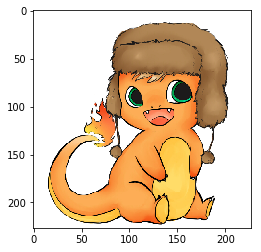

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


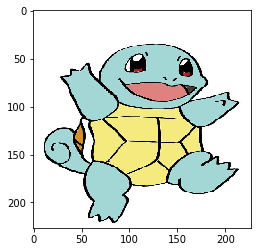

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


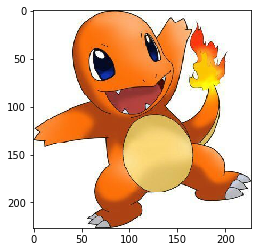

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


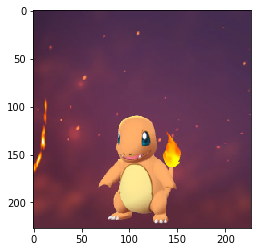

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


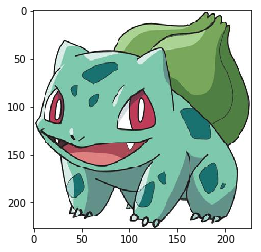

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


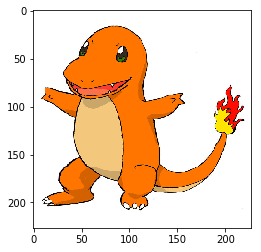

In [27]:
for ix in range(0,200,10):
    plt.imshow(X_train[ix])
    print (Y_train[ix])
    plt.show()

In [49]:
res_model = ResNet50(include_top=False,weights='imagenet', input_shape=(227,227,3))

In [50]:
res_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 227, 227, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 233, 233, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 114, 114, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 114, 114, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [51]:
av1 = GlobalAveragePooling2D()(res_model.output)
fc1 = Dense(256, activation='relu')(av1)
d1 = Dropout(0.25)(fc1)
out = Dense(10, activation='softmax')(d1)

tl_model = Model(inputs=res_model.input,outputs=out)
tl_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 227, 227, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 233, 233, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 114, 114, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 114, 114, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [52]:
for idx, layer in enumerate(tl_model.layers):
    print (idx, layer)

(0, <keras.engine.input_layer.InputLayer object at 0x7fef8b27e8d0>)
(1, <keras.layers.convolutional.ZeroPadding2D object at 0x7fefac54ed90>)
(2, <keras.layers.convolutional.Conv2D object at 0x7fef8b27ec90>)
(3, <keras.layers.normalization.BatchNormalization object at 0x7fef8b27eb90>)
(4, <keras.layers.core.Activation object at 0x7fef8b213250>)
(5, <keras.layers.convolutional.ZeroPadding2D object at 0x7fefac95df90>)
(6, <keras.layers.pooling.MaxPooling2D object at 0x7fef8b225050>)
(7, <keras.layers.convolutional.Conv2D object at 0x7fef8b22eb50>)
(8, <keras.layers.normalization.BatchNormalization object at 0x7fef8b142450>)
(9, <keras.layers.core.Activation object at 0x7fef8b142e50>)
(10, <keras.layers.convolutional.Conv2D object at 0x7fef8b0d1f90>)
(11, <keras.layers.normalization.BatchNormalization object at 0x7fef8b170810>)
(12, <keras.layers.core.Activation object at 0x7fef8b100990>)
(13, <keras.layers.convolutional.Conv2D object at 0x7fef8afd2e10>)
(14, <keras.layers.convolutional.Co

In [53]:
for ix in range(168):
    tl_model.layers[ix].trainable = False

In [58]:
tl_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 227, 227, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 233, 233, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 114, 114, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 114, 114, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [59]:
adam = Adam(lr = 0.00003)

In [60]:
tl_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

(None,)

In [61]:
hist = tl_model.fit(X_train,Y_train,epochs=10,shuffle=True,batch_size=64,validation_split=0.20)

Train on 1001 samples, validate on 251 samples
Epoch 1/10
1001/1001 [==============================] - 99s 99ms/step - loss: 1.6282 - acc: 0.5045 - val_loss: 2.3940 - val_acc: 0.1155
Epoch 2/10
1001/1001 [==============================] - 91s 91ms/step - loss: 1.2781 - acc: 0.6324 - val_loss: 2.3855 - val_acc: 0.1076
Epoch 3/10
1001/1001 [==============================] - 92s 92ms/step - loss: 0.9789 - acc: 0.7522 - val_loss: 2.3781 - val_acc: 0.0916
Epoch 4/10
1001/1001 [==============================] - 98s 97ms/step - loss: 0.7906 - acc: 0.8172 - val_loss: 2.3809 - val_acc: 0.1355
Epoch 5/10
1001/1001 [==============================] - 104s 104ms/step - loss: 0.6430 - acc: 0.8591 - val_loss: 2.3783 - val_acc: 0.1155
Epoch 6/10
1001/1001 [==============================] - 101s 100ms/step - loss: 0.5137 - acc: 0.8951 - val_loss: 2.3784 - val_acc: 0.1235
Epoch 7/10
1001/1001 [==============================] - 101s 101ms/step - loss: 0.4389 - acc: 0.9171 - val_loss: 2.3816 - val_acc: 0.

In [64]:
X_test = np.load("./pokemon_data/data_dump/X_test.npy")
Y_test = np.load("./pokemon_data/data_dump/Y_test.npy")
Y_test = np_utils.to_categorical(Y_test)

In [65]:
tl_model.evaluate(X_test,Y_test)

313/313 [==============================] - 38s 121ms/step


[2.433090108652084, 0.0894568687239394]